# 7. Математическая статистика

Математическая статистика — наука, которая разрабатывает математические методы систематизации и применения статистических данных для практических и научных выводов. И, конечно, статистика используется в такой дисциплине, как анализ данных.

На этом занятии мы не будем углубляться в теорию, а только рассмотрим применение некоторых статистических функций на примерах.

Для выполнения заданий мы будем использовать подмодуль stats из библиотеки SciPy. Этот модуль содержит большое количество вероятностных распределений, сводную и частотную статистику, корреляционные функции и статистические тесты и многое другое.

Описание функций Вы можете найти в документации https://docs.scipy.org/doc/scipy/reference/stats.html

In [1]:
# подключим scipy.stats, а также два модуля, которые мы уже использовали ранее для работы с данными pandas и numpy

import pandas as pd
import numpy as np  
import scipy.stats as stats

Используем те же данные, что и на прошлом занятии - файл smoking.csv.

Скачать его заново можно по ссылке https://disk.yandex.ru/d/YFmZ4tPjpTMjmQ

In [3]:
path = r'C:\Users\Анна\Desktop\HSE courses\HSE Data analysis\3 модуль\6. Pandas\smoking'

df = pd.read_csv(f"{path}/smoking.csv", sep=";", encoding='windows-1251')
df.head(2)

,Country,Year,Daily cigarettes,Smokers.Total,Smokers.Female,Smokers.Male
0,Afghanistan,1980,5.6999998,733520,81707,651813
1,Afghanistan,1981,5.8000002,720102,79276,640826


**Генеральная совокупность** — это множество всех объектов, относительно которых предполагается делать выводы в рамках конкретного исследования.

**Выборка** — множество случаев (испытуемых, объектов, событий, образцов),  с помощью определённой процедуры выбранных из генеральной совокупности для участия в исследовании.

**Распределение (закон распределения) показателя** – это закон, определяющий область значений этого показателя и соответствующие вероятности появления этих значений. Распределение позволяет ответить на вопрос, с какой вероятностью показатель принимает то или иное значение.

### Описательные статистики выборки

**Статистикой** называют значение некоторого показателя, вычисленного по выборке. Условно их можно разделить на 3 группы, тем или иным способом характеризующие распределение выборки:

- **Характеристики положения (меры центральной тенденции):** выборочное среднее, мода, медиана. Некоторым образом характеризуют среднее значение выборки.


Следует отметить, что числовыми характеристиками обладает как выборочная, так и генеральная совокупность. Например, среднее значение генеральной совокупности называется **математическим ожиданием или теоретическим (генеральным) средним**. Однако на практике в анализе данных работают с конечными выборками и с их статистиками.

In [10]:
# вычислим среднее по столбцу Smokers.Male
print('Среднее:', df['Smokers.Male'].mean())

# вычислим моду по этому же столбцу
print('Мода:', df['Smokers.Male'].mode())

# вычислим медиану
print('Медиана:', df['Smokers.Male'].median())

Среднее: 7625440.649903288
Мода: 0      2068
1      2086
2      2154
3     11426
4     20858
5     28551
6     32952
7     35138
8    314048
9    479547
Name: Smokers.Male, dtype: int64
Медиана: 512561.5


In [7]:
# убедимся в том, что это действительно мода, построив частотную таблицу
df['Smokers.Male'].value_counts()

Smokers.Male
28551     2
2068      2
2154      2
11426     2
32952     2
         ..
733076    1
735491    1
739726    1
743916    1
850896    1
Name: count, Length: 6194, dtype: int64

- **Характеристики рассеяния (меры изменчивости, разброса):** размах вариации, дисперсия, стандартное отклонение, коэффициент вариации. Характеризуют разброс значений выборки вокруг среднего.

Представим себе, что мы делаем выстрелы по мишени. Среднее $\bar{X}$, дисперсию $S^2$ и стандартное отклонение $S$ можно изобразить примерно так:

<img src="https://i.ibb.co/HFQ1Lm0/image.png" width=250>



In [14]:
# вычислим размах вариации количества выкуренных сигарет в день

df['Daily cigarettes'].max() - df['Daily cigarettes'].min()


45564.0

In [15]:
# Вычислим дисперсию по той же колонке
# по умолчанию вычисляется несмещенная оценка теоретической дисперсии

df['Daily cigarettes'].var()

515516724.91803914

In [16]:
# вычислим стандартное отклонение 
df['Daily cigarettes'].std()  # по умолчанию несмещенная оценка

22704.993391719785

- **Характеристики формы распределения:** асимметрия и эксцесс. Характеризуют геометрическую форму распределения. Мы опустим их вычисление.


### Квантили

Вне зависимости от формы распределения случайной величины, мы можем использовать непараметрический подход к выявлению выбросов и распределений значений случайной величины.

Популярным непараметрическим методом выявления выбросов является метод **межквартильного размаха* (Inter Quantile Range, IQR).

Квантиль уровня $\gamma$ - это значение X, меньше которого окажется $\gamma$ % значений X в выборке (или в генеральной совокупности).

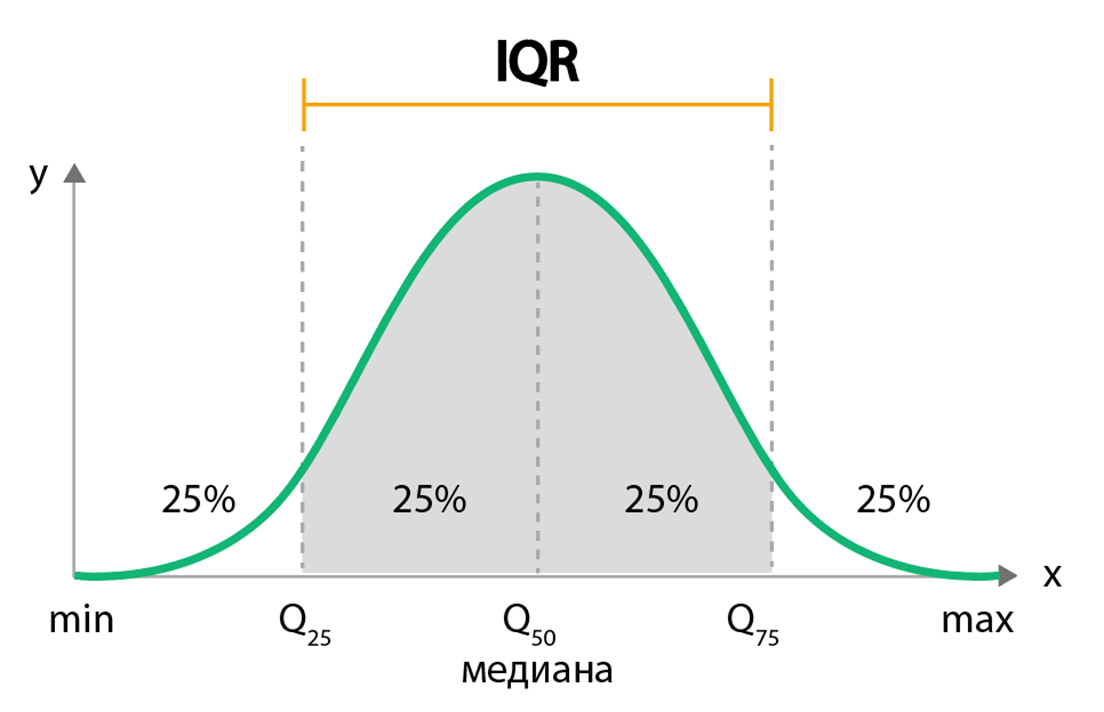

**1-ый квартиль Q25 (Q1)**: это такое число, что ровно 25% выборки меньше его (фактически это квантиль уровня 0,25).

**2-ой квартиль Q50 (Q2)**: это такое число, что ровно 50% выборки меньше его (фактически это квантиль уровня 0,5, он же медиана).

**3-й квартиль Q75 Q(3)**: это такое число, что ровно 75% выборки меньше его (квантиль уровня 0,75).

Правило: если элемент не попадает в интервал

$[Q1 – 1.5 * (Q3 – Q1); Q3 + 1.5 * (Q3 – Q1)]$,

то он объявляется **выбросом**.

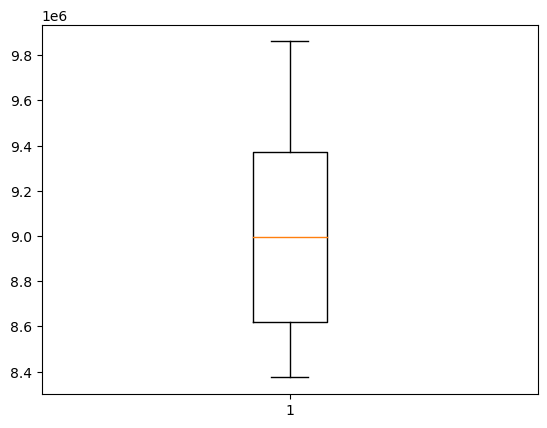

In [27]:
# мы можем визуализировать происходящее с помощью специальной диаграммы - ящик с усами(boxplot).
# например, построим boxplot для распределения количества курящих женщин в России

import matplotlib.pyplot as plt

plt.boxplot(df[df.Country == 'Russia']['Smokers.Female']);

In [29]:
# найдём точные значения квартилей

Q1 = df[df.Country == 'Russia']['Smokers.Female'].quantile(0.25)
Q3 = df[df.Country == 'Russia']['Smokers.Female'].quantile(0.75)

In [ ]:
# теперь сами посчитайте верхнюю и нижнюю границы межквартильного размаха по формуле


### Проверка статистических гипотез

Ссылка на материал на Google Colab:
https://colab.research.google.com/drive/1SFXdJpAgLBHno6Mo9YGXyAr8DljY1E5S?usp=sharing

**Статистическая гипотеза** - это некоторое предположение о свойствах и характеристиках исследуемых генеральных совокупностей.

Например, мы можем предположить, что мороженое покупают чаще, когда на улице жарко. 
Мы собрали данные о продажах мороженого и температуре, поделили дни на «жаркие» и «нежаркие». Даже нашли среднее количество проданного мороженого в оба типа дней и обнаружили, что в жаркие дни мороженое действительно покупают чаще. 

Но как понять, что разница действительно обусловлена погодой, а не является результатом случайности? Иначе говоря, как удостовериться, что это различие является **статистически значимым**?

Для этого мы и будем использовать статистические критерии.


**1. Выдвигаются основная и альтернативная гипотезы.**

$H_0$: основная (нулевая) гипотеза, подлежащая проверке

$H_1$: альтернативная (конкурирующая) гипотеза

**2. Определяются критерии проверки гипотезы.**

**3. В зависимости от результата сравнения вычисленной по выборке статистики с критическим значением делается вывод  об (не)отклонении нулевой гипотезы.**

Гипотеза всегда проверяется на некотором уровне значимости.

**Уровень значимости α** – это допустимая вероятность ошибки 1-го рода, то есть отклонения нулевой гипотезы при том, что она верна. Чем ниже α, тем сильнее мы боимся ошибиться и более строгие требования к надежности результата выдвигаем.

Типичные значения α:
  0,01 (1%),
   0,05 (5%),
   0,1   (10%)

**p-значение** (p-value) – это эмпирический уровень значимости (полученный по данным выборки). Его удобно сравнивать с α и делать выводы о состоятельности нулевой гипотезы.

Если p-значение ≤ α, на данном уровне значимости гипотеза $H_0$ отклоняется.

Например, p-value = 0,009. Это значит, что на уровне значимости 1% (а также 5% и любом более высоком) нулевая гипотеза отклоняется.

**В зависимости от того, какую гипотезу мы хотим проверить, нужно использовать разные критерии!**

Для проверки гипотез о значении математического ожидания, когда не известна дисперсия данных, используется так называемый t-тест Стьюдента.

In [31]:
# Проверим гипотезу о том, что среднее количество курильщиков в России такое же, как в Канаде
# на уровне значимости 5%

stats.ttest_ind(df[df.Country == 'Russia']['Smokers.Total'], df[df.Country == 'Canada']['Smokers.Total'], alternative='two-sided')

TtestResult(statistic=133.05029201608505, pvalue=6.434373170165989e-80, df=64.0)

In [ ]:
# проверьте справедливость результата

In [36]:
# проверим гипотезу о том, что среднее количество мужчин курильщиков равно 7_600_000
# на уровне значимости 1%

stats.ttest_1samp(df['Smokers.Total'], 7_600_000, alternative='two-sided')

TtestResult(statistic=2.024930447055995, pvalue=0.04291725775023974, df=6203)

Ещё один критерий различия между двумя независимыми выборками - U-критерий Манна-Уитни. Метод определяет, насколько слабо перекрещиваются (совпадают) значения между двумя выборками.

In [35]:
# Проверим гипотезу о том, что среднее количество курильщиков в России БОЛЬШЕ, чем в Канаде
# на уровне значимости 10%

stats.mannwhitneyu(df[df.Country == 'Russia']['Smokers.Total'], df[df.Country == 'Canada']['Smokers.Total'], alternative='greater')

MannwhitneyuResult(statistic=1089.0, pvalue=1.5130208962530874e-12)

Для проверки гипотез о пропорциях рспределений или о наличии связи между признаками в генеральной совокупности используется критерий $χ^{2}$ (хи-квадрат или критерий Пирсона). 

In [39]:
# проверим наличие линейной зависимости между количеством курильщиков мужчин и выкуренных за день сигарет

stats.pearsonr(df['Smokers.Male'], df['Daily cigarettes'])

PearsonRResult(statistic=0.00999981004317213, pvalue=0.43098878276168395)

Для проверки гипотезы о форме распределения случайно величины мы можем использовать критерий Шапиро-Уилка. Этот критерий используется для проверки на принадлежность наблюдаемой выборки к нормальной генеральной совокупности:

In [43]:
# проверим гипотезу о том, что средние значения по количетсву курильщиков в стране имеют нормальное распределение

means = df.groupby(by='Country').mean()

stats.shapiro(means['Smokers.Male'])

ShapiroResult(statistic=0.10699248313903809, pvalue=6.47236984722078e-29)

Также для проверки гипотез о форме распределения можно использовать критерий Харке-Бера. Это критерий согласия, который определяет, имеют ли выборочные данные ассиметрию и эксцесс, соответствующие нормальному распределению.

In [45]:
# проверим гипотезу о том, что средние значения по количетсву курильщиков в стране имеют нормальное распределение

means = df.groupby(by='Country').mean()

stats.jarque_bera(means['Smokers.Male'])

SignificanceResult(statistic=169560.64890190773, pvalue=0.0)

In [ ]:
# самостоятельная работа

Есть ещё множество других критериев, которых мы сегодня не коснулись. Вы можете заняться их изучением самостоятельно.

### Корреляция

**Корреляция** — статистическая взаимосвязь двух или более величин. При этом изменения значений одной или нескольких из этих величин сопутствуют систематическому изменению значений другой или других величин.

Математической мерой корреляции двух величин служит *корреляционный коэффициент*.

Рассмотрим два корреляционных коэффициента:

**Корреляционный коэффициент Пирсона (Брависа — Пирсона)**, который оценивает корреляцию между наборами данных, заданными парами значений $(x_i, y_i) и (\tilde{x_i}, \tilde{y_i})$, при $i =1, ..., n$ :

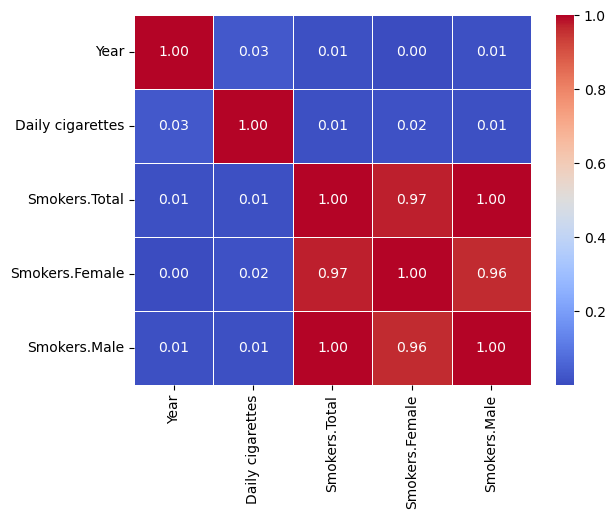

In [50]:
# вычислим коэффициент корреляции Пирсона между всеми числовыми колонками датафрейма
# и построим с помощью seaborn  тепловую карту  

import seaborn as sns

corr_pearson = df.corr(numeric_only=True)
sns.heatmap(corr_pearson,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5);

In [46]:
# вычислим коэффициент корреляции Пирсона между количеством мужчин курильщиков и женщин курильщиков

stats.pearsonr(df['Smokers.Male'], df['Smokers.Female'])

PearsonRResult(statistic=0.9614881040137402, pvalue=0.0)

In [ ]:
# самостоятельно проверьте корелляцию количества мужчин-курильщиков в 80-х годах с количеством в 90-х годах


**Коэффициент корреляции Спирмена (Spearman rank correlation coefficient)** — мера линейной связи между случайными величинами. Корреляция Спирмена является ранговой, то есть для оценки силы связи используются не численные значения, а соответствующие им ранги. Коэффициент инвариантен по отношению к любому монотонному преобразованию шкалы измерения.


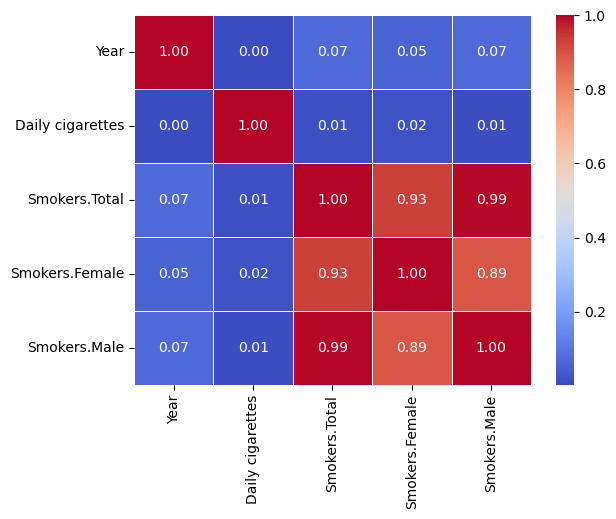

In [51]:
# вычислим коэффициент корреляции Пирсона между всеми числовыми колонками датафрейма
# и построим с помощью seaborn  тепловую карту  

import seaborn as sns

corr_spearman = df.corr(method='spearman', numeric_only=True)
sns.heatmap(corr_spearman,cmap='coolwarm',annot=True, fmt=".2f", linewidths=0.5);

In [52]:
# вычислим коэффициент корреляции Пирсона между количеством  женщин курильщиков и общим количеством

stats.spearmanr(df['Smokers.Female'], df['Smokers.Total'])

SignificanceResult(statistic=0.9327597287405162, pvalue=0.0)

In [ ]:
# самостоятельно проверьте корреляцию количества курильшиков мужчин в Индии и в Пакистане